In [1]:
# pip install git+https://github.com/xunzheng/notears.git

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from notears.linear import notears_linear
import networkx as nx
import matplotlib.pyplot as plt

# 데이터 전처리
df = pd.read_csv("training_data.csv")
# X = df.values
# label 제거 필요
X = df.drop(columns=["Unnamed: 0", "label"]).values
X = StandardScaler().fit_transform(X)

# NOTEARS 실행
W = notears_linear(X, lambda1=0.1, loss_type='l2')  # lambda1으로 sparsity 조절

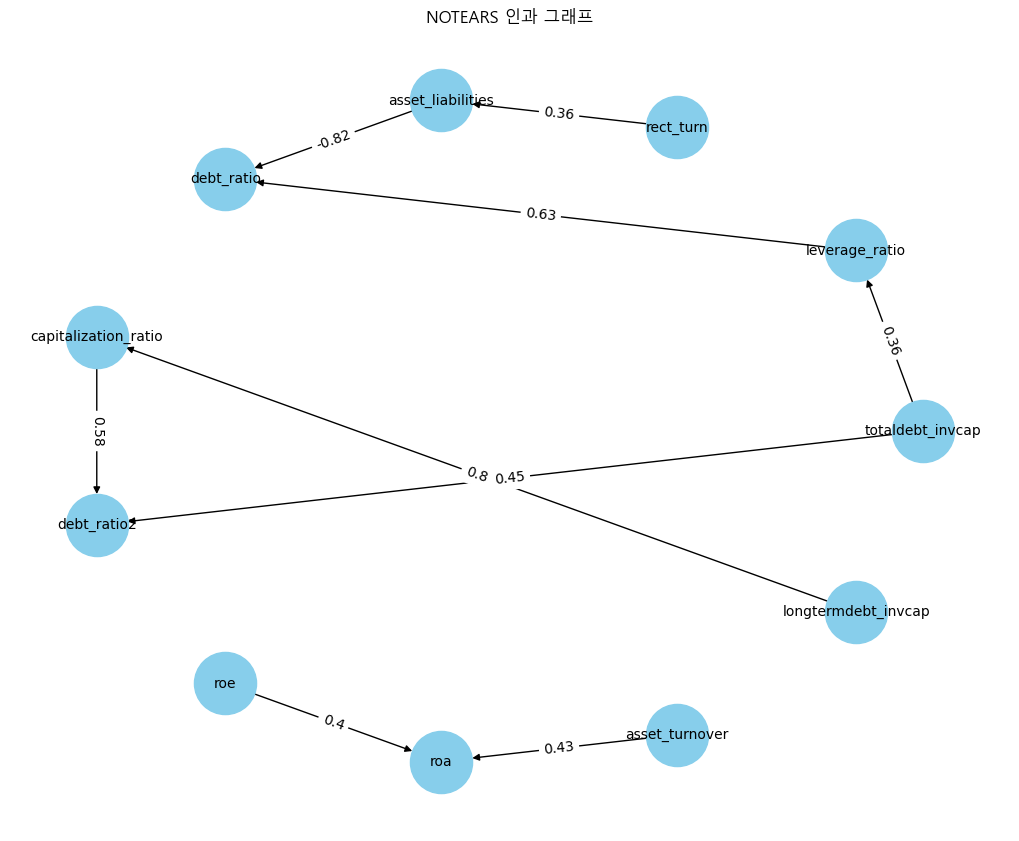

In [3]:
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False


# 인과 그래프 시각화
cols = df.columns[1:-1]  # label 제외한 열 이름
G = nx.DiGraph()

for i in range(len(cols)):
    for j in range(len(cols)):
        if abs(W[i, j]) > 0.01:  # threshold 적용(0 제외)
            G.add_edge(cols[j], cols[i], weight=round(W[i, j], 2))

plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.kamada_kawai_layout(G)
pos = nx.circular_layout(G)

nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("NOTEARS 인과 그래프")
plt.show()


In [8]:
# ==========================
# 상위 15개 간선 CSV 저장
# ==========================
from pathlib import Path
import pandas as pd

edges_all = []
for i in range(len(cols)):
    for j in range(len(cols)):
        if i == j:
            continue
        w = float(W[i, j])
        if abs(w) > 0.01:  # threshold 적용
            edges_all.append((cols[j], w, cols[i]))  # (출발, 가중치, 도착)

# |w| 내림차순 정렬 후 상위 15개
top_k = sorted(edges_all, key=lambda x: abs(x[1]), reverse=True)[:15]

# 15개보다 적으면 공백으로 채우기
while len(top_k) < 15:
    top_k.append(("", "", ""))

df_top = pd.DataFrame(top_k, columns=["출발 노드", "가중치", "도착 노드"])

out_dir = Path("./")
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "top15_edges_notears.csv"

df_top.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"상위 15개 간선 CSV 저장 완료: {out_path.resolve()}")


상위 15개 간선 CSV 저장 완료: D:\University\3-2\PADALab\bank_failure_prediction_2\practice\Bank_Failure_Prediction_2\top15_edges_notears.csv
